In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("student_lifestyle_dataset.csv")

In [3]:
df.head()

Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  
0  2.99     Moderate  
1  2.75          Low  
2  2.67          Low  
3  2.88     Moderate  
4  3.51         High

In [4]:
print("shape of data", df.shape)

shape of data (2000, 8)


In [9]:
print(df.info())
print("\n")
#nNo empty records

print(df.duplicated().sum())
#No duplicated records

data = df.drop("Student_ID",axis=1)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None


0


Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

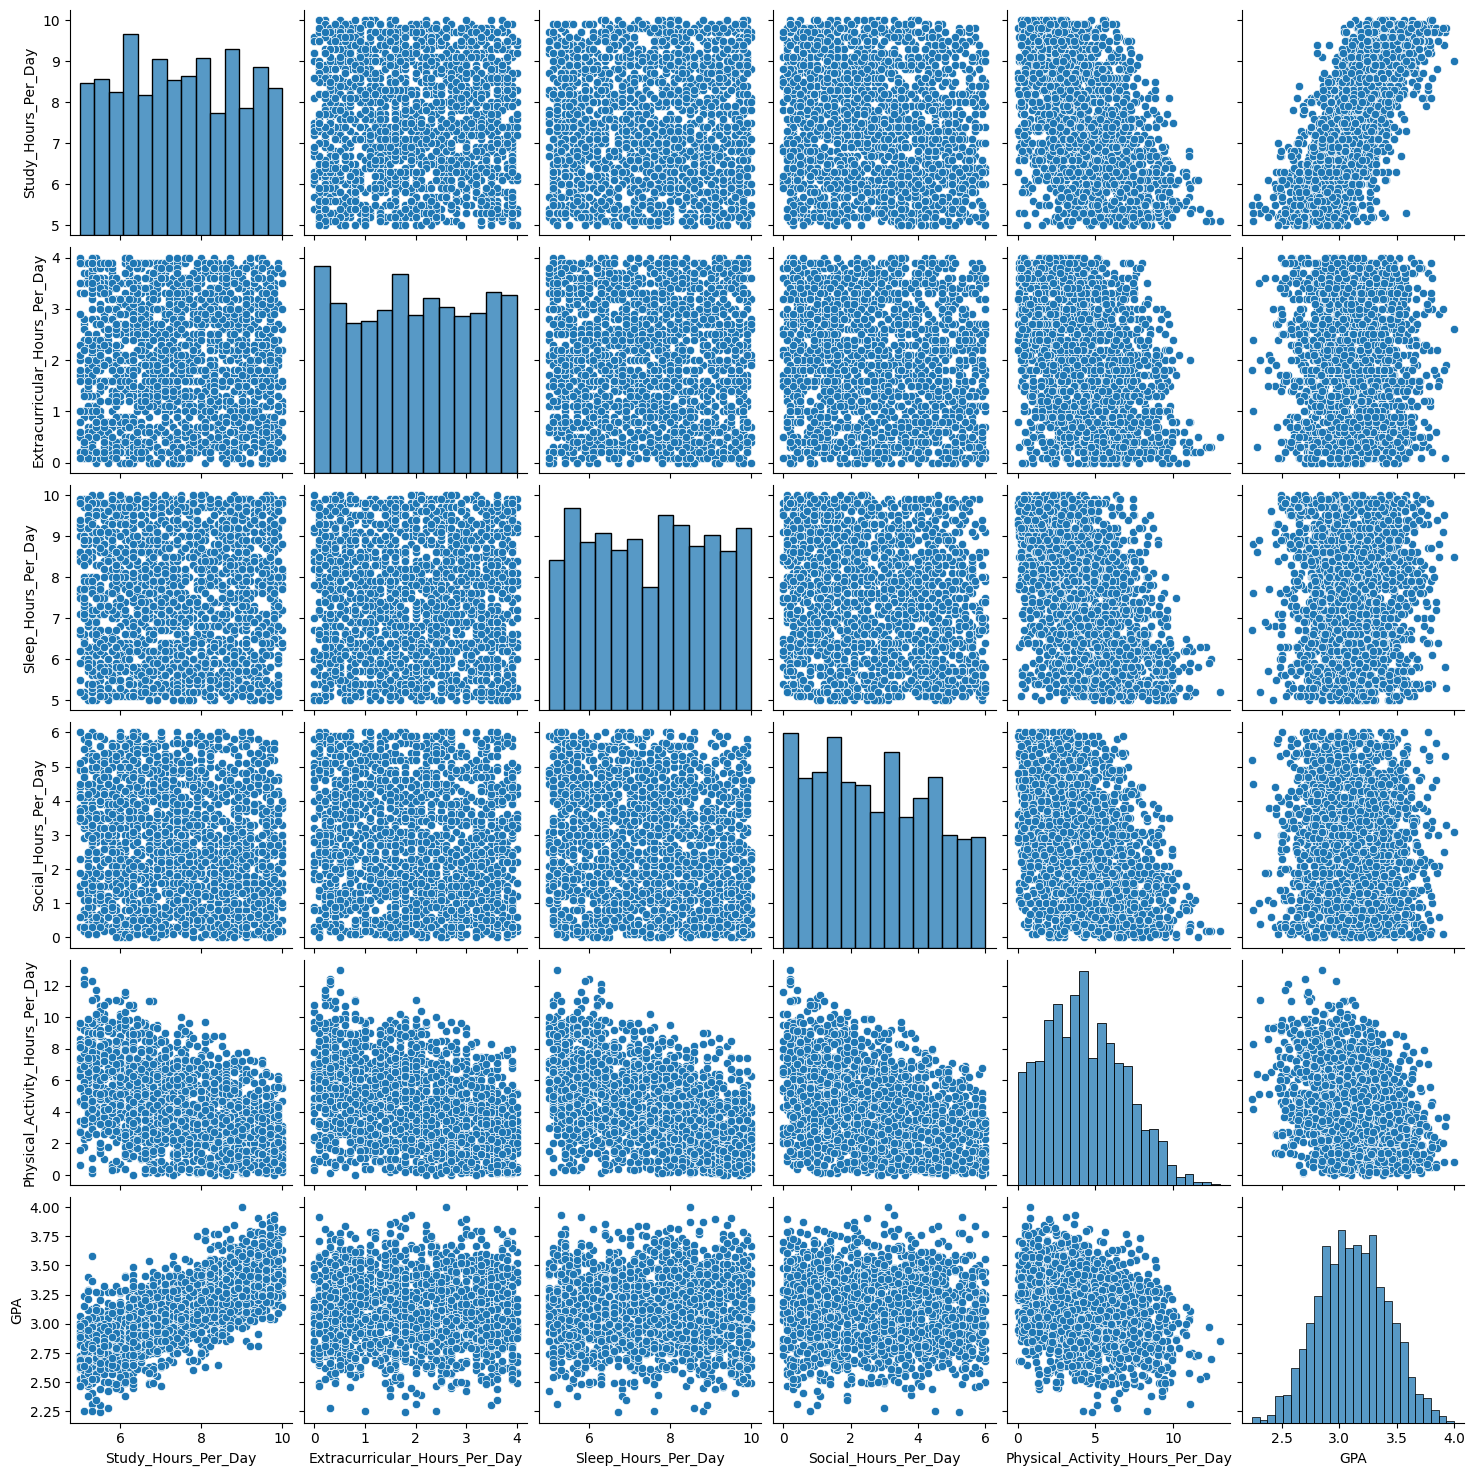

In [70]:
sns.pairplot(data=data)
plt.show()

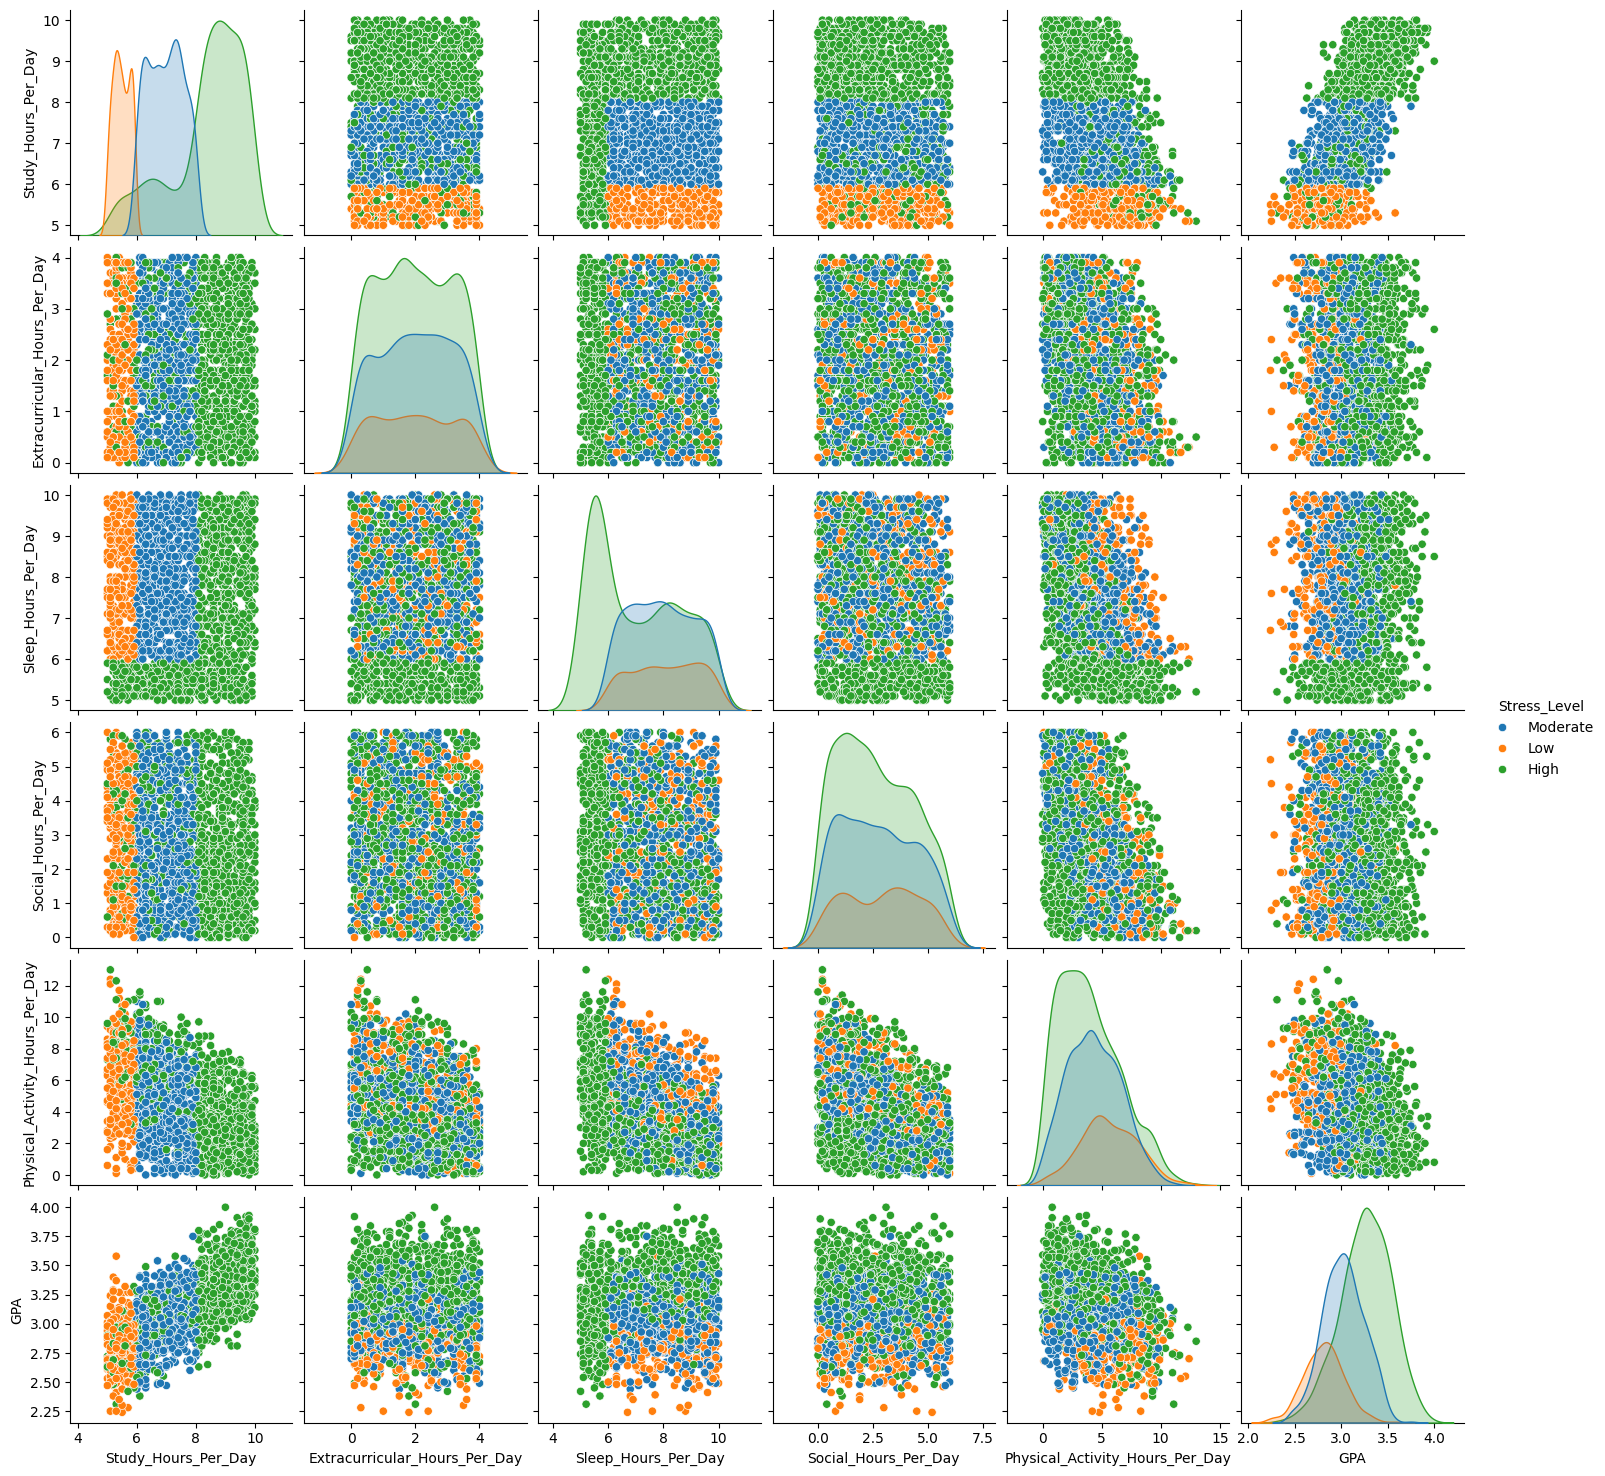

In [95]:
sns.pairplot(data=data,hue="Stress_Level")
plt.show()

In [10]:
print(data["Stress_Level"].unique())
#saaaaad 

['Moderate' 'Low' 'High']


In [11]:
from sklearn.preprocessing import LabelEncoder

#data['Stress_Level'] = map(lambda x: stress_mapping[x], data['Stress_Level'])
#data.head()

#le=LabelEncoder()
#data["Stress_Level"] = le.fit_transform(data["Stress_Level"])
#data.head()


In [12]:

data2 = data.copy()
stress_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
data2['Stress_Level'] = data2['Stress_Level'].map(stress_mapping)
print(data2.head())

   Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  ...   GPA  Stress_Level
0                  6.9                            3.8  ...  2.99             1
1                  5.3                            3.5  ...  2.75             0
2                  5.1                            3.9  ...  2.67             0
3                  6.5                            2.1  ...  2.88             1
4                  8.1                            0.6  ...  3.51             2

[5 rows x 7 columns]


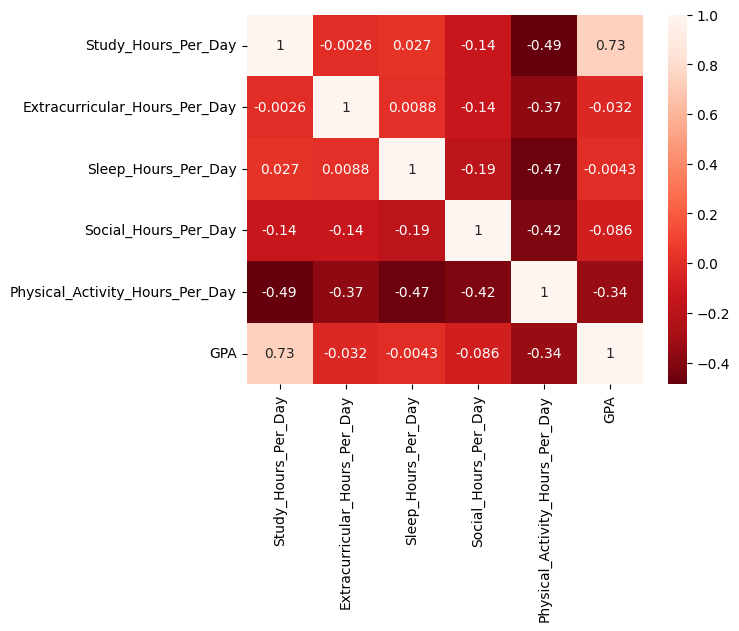

In [13]:
corr_matrix = data.corr( numeric_only=True )
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')
plt.show()
#its when Stress_level is Low,moderate and high!!!!!!!!!!

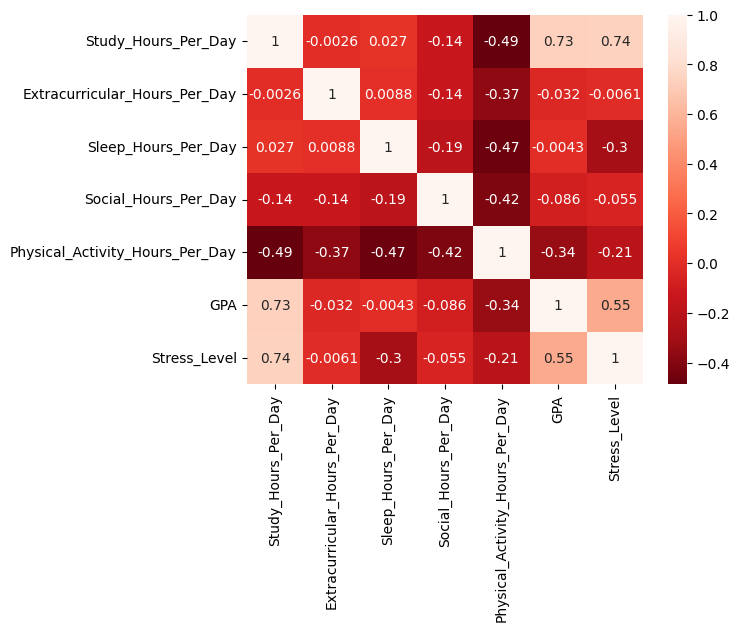

In [14]:
corr_matrix = data2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')
plt.show()

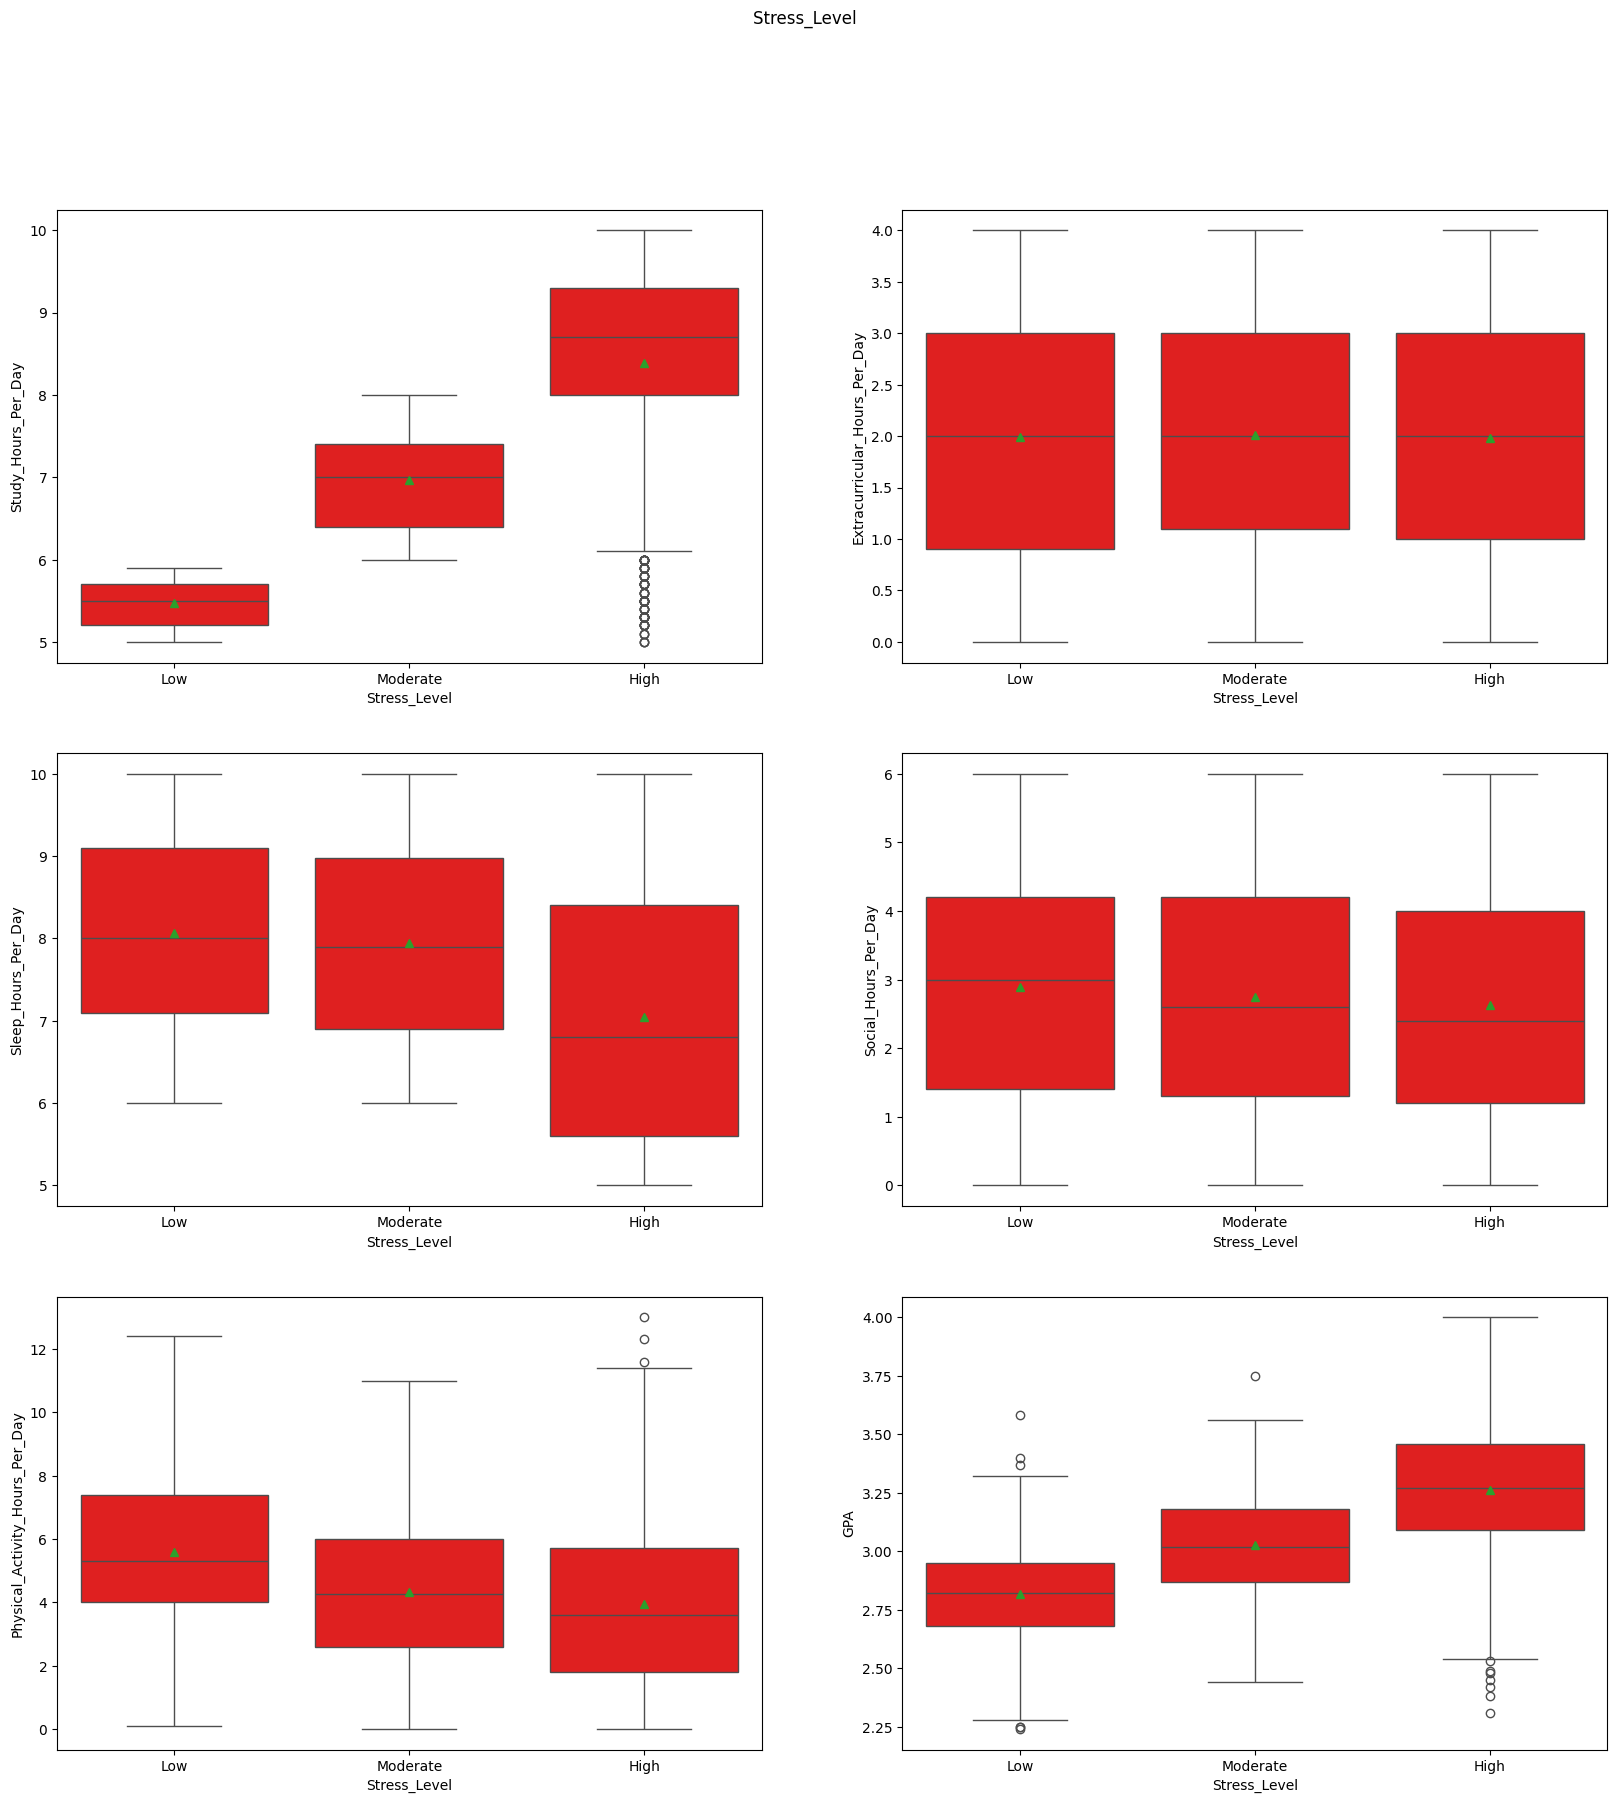

In [15]:
#feature importance model

order = ['Low', 'Moderate', 'High']
data['Stress_Level'] = pd.Categorical(data['Stress_Level'], categories=order, ordered=True)

fig,axes=plt.subplots(3,2,figsize=(20,20))
fig.suptitle("Stress_Level ")

for i,ax in enumerate(axes.flat):
    sns.boxplot(data=data,x='Stress_Level',y=data.columns[i],color="red",showmeans=True,ax=ax)
#plt.subplots_adjust(hspace=0.4,wspace=0.4)

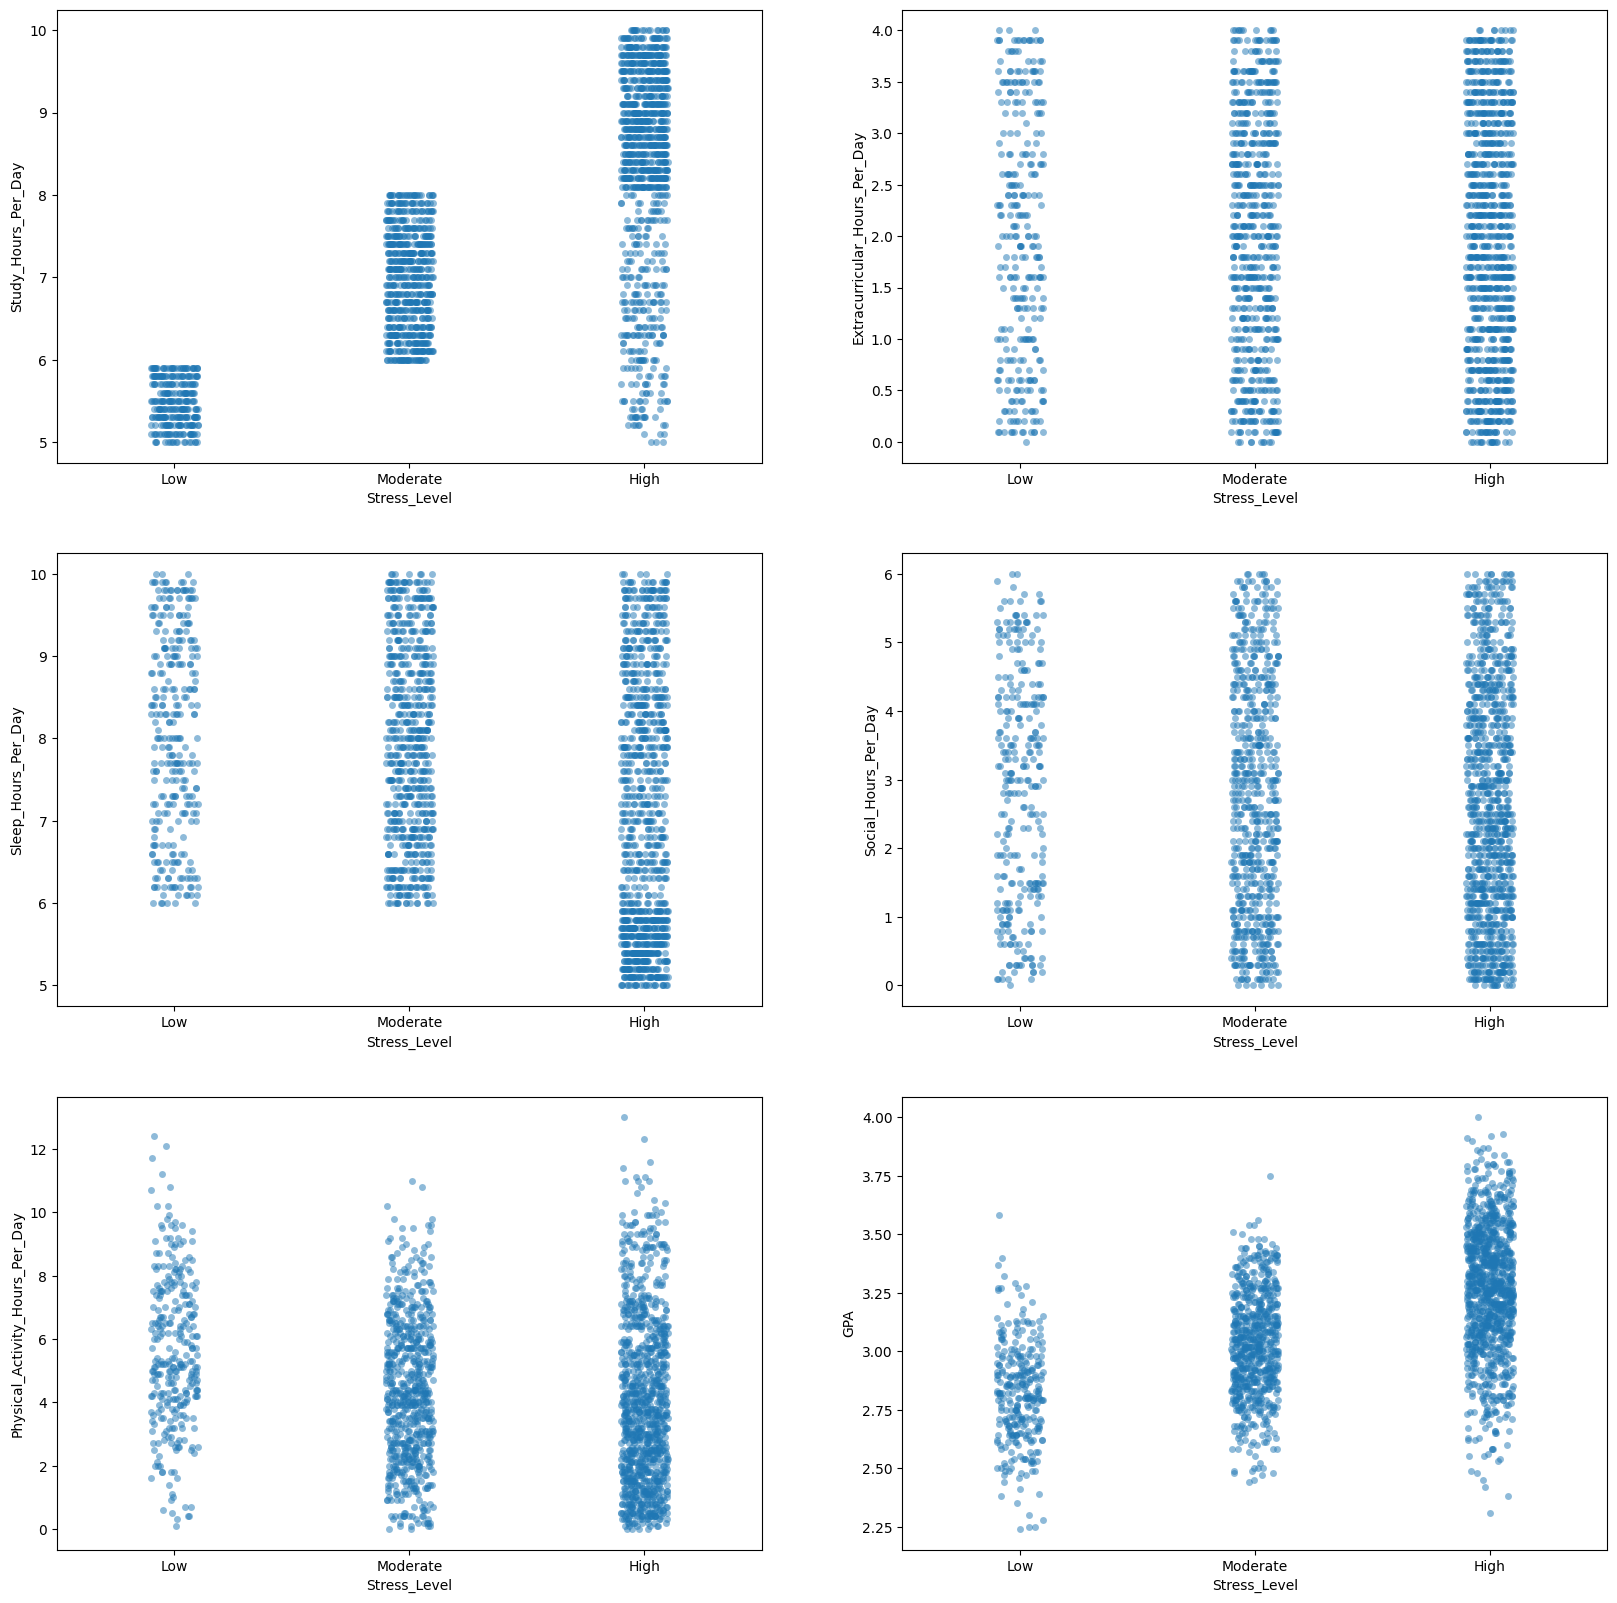

In [133]:
fig,axes=plt.subplots(3,2,figsize=(20,20))

for i,ax in enumerate(axes.flat):
    sns.stripplot(x='Stress_Level', y=data.columns[i], data=data, ax=ax,alpha=0.5)




In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [18]:
data2.head()

Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  ...   GPA  Stress_Level
0                  6.9                            3.8  ...  2.99             1
1                  5.3                            3.5  ...  2.75             0
2                  5.1                            3.9  ...  2.67             0
3                  6.5                            2.1  ...  2.88             1
4                  8.1                            0.6  ...  3.51             2

[5 rows x 7 columns]

In [20]:
#we are trying to find stress_level

x = data2.drop("Stress_Level",axis=1)
print(x.head())
y = data2["Stress_Level"]
print(y.head())
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

   Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  ...  Physical_Activity_Hours_Per_Day   GPA
0                  6.9                            3.8  ...                              1.8  2.99
1                  5.3                            3.5  ...                              3.0  2.75
2                  5.1                            3.9  ...                              4.6  2.67
3                  6.5                            2.1  ...                              6.5  2.88
4                  8.1                            0.6  ...                              6.6  3.51

[5 rows x 6 columns]
0    1
1    0
2    0
3    1
4    2
Name: Stress_Level, dtype: int64


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)



0.9175
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        54
           1       0.94      0.88      0.91       145
           2       0.95      0.96      0.95       201

    accuracy                           0.92       400
   macro avg       0.88      0.91      0.89       400
weighted avg       0.92      0.92      0.92       400

